In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load Dataset
df = pd.read_csv("jobs.csv")
print(df.head())


        job_title seniority_level   status      company  \
0  data scientist          senior   hybrid  company_003   
1  data scientist            lead   hybrid  company_005   
2  data scientist          senior  on-site  company_007   
3  data scientist          senior   hybrid  company_008   
4  data scientist             NaN  on-site  company_009   

                                            location    post_date  \
0                             Grapevine, TX . Hybrid  17 days ago   
1                            Fort Worth, TX . Hybrid  15 days ago   
2  Austin, TX . Toronto, Ontario, Canada . Kirkla...  a month ago   
3  Chicago, IL . Scottsdale, AZ . Austin, TX . Hy...   8 days ago   
4                                            On-site   3 days ago   

            headquarter       industry ownership company_size  revenue  \
0   Bentonville, AR, US         Retail    Public     €352.44B   Public   
1       Detroit, MI, US  Manufacturing    Public      155,030  €51.10B   
2  Redwo

In [5]:
# Check columns and datatypes
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        941 non-null    object
 1   seniority_level  884 non-null    object
 2   status           688 non-null    object
 3   company          944 non-null    object
 4   location         942 non-null    object
 5   post_date        944 non-null    object
 6   headquarter      944 non-null    object
 7   industry         944 non-null    object
 8   ownership        897 non-null    object
 9   company_size     944 non-null    object
 10  revenue          929 non-null    object
 11  salary           944 non-null    object
 12  skills           944 non-null    object
dtypes: object(13)
memory usage: 96.0+ KB
None


In [6]:
# Check missing values
print("\nMissing Values:")
print(df.isna().sum())


Missing Values:
job_title            3
seniority_level     60
status             256
company              0
location             2
post_date            0
headquarter          0
industry             0
ownership           47
company_size         0
revenue             15
salary               0
skills               0
dtype: int64


In [9]:
# Fill missing values with appropriate replacements
df['job_title'].fillna('Not specified', inplace=True)
df['seniority_level'].fillna('Not Specified', inplace=True)
df['status'].fillna('Unknown', inplace=True)
df['location'].fillna('Not Mentioned', inplace=True)
df['ownership'].fillna('Private', inplace=True)
df['revenue'].fillna('Not Disclosed', inplace=True)

print(df.isna().sum())

job_title          0
seniority_level    0
status             0
company            0
location           0
post_date          0
headquarter        0
industry           0
ownership          0
company_size       0
revenue            0
salary             0
skills             0
dtype: int64


In [11]:
# Removing Duplicates (if any)
print("Before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

Before removing duplicates: (944, 13)
After removing duplicates: (944, 13)


In [12]:
# Convert Dates
df['post_date']= pd.to_datetime(df['post_date'], errors='coerce')
print(df['post_date'].head())

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: post_date, dtype: datetime64[ns]


C:\Users\jaswa\AppData\Local\Temp\ipykernel_31300\2278921063.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['post_date']= pd.to_datetime(df['post_date'], errors='coerce')


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   job_title        944 non-null    object        
 1   seniority_level  944 non-null    object        
 2   status           944 non-null    object        
 3   company          944 non-null    object        
 4   location         944 non-null    object        
 5   post_date        0 non-null      datetime64[ns]
 6   headquarter      944 non-null    object        
 7   industry         944 non-null    object        
 8   ownership        944 non-null    object        
 9   company_size     944 non-null    object        
 10  revenue          944 non-null    object        
 11  salary           944 non-null    object        
 12  skills           944 non-null    object        
dtypes: datetime64[ns](1), object(12)
memory usage: 96.0+ KB
None


In [14]:
print(df.isna().sum())

job_title            0
seniority_level      0
status               0
company              0
location             0
post_date          944
headquarter          0
industry             0
ownership            0
company_size         0
revenue              0
salary               0
skills               0
dtype: int64


In [15]:
print(df['post_date'].head(10))


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: post_date, dtype: datetime64[ns]


In [18]:
print("Total Jobs:", df.shape[0])

Total Jobs: 944


In [19]:
print("Unique Job titles:", df['job_title'].nunique())

Unique Job titles: 5


In [21]:
print("Unique Companies:", df['company'].nunique())

Unique Companies: 420


In [22]:
print("Unique Locations:", df['location'].nunique())

Unique Locations: 432


In [24]:
# Top Job Titles in 2025
top_jobs = df['job_title'].value_counts().head(10)
print(top_jobs)

job_title
data scientist               856
machine learning engineer     80
data engineer                  4
Not specified                  3
data analyst                   1
Name: count, dtype: int64


In [25]:
# Most Common Companies Hiring
top_companies = df['company'].value_counts().head(10)
print(top_companies)

company
company_134    30
company_003    24
company_395    21
company_941    21
company_917    20
company_244    20
company_273    19
company_844    18
company_008    17
company_421    13
Name: count, dtype: int64


In [26]:
# Top Hiring Locations
top_locations = df['location'].value_counts().head(10)
print(top_locations)

location
Bengaluru, Karnataka, India             52
Fully Remote                            35
New York, NY                            22
United States                           22
On-site                                 18
Mountain View, CA                       17
San Francisco, CA                       17
Sunnyvale, CA                           13
Bengaluru, Karnataka, India . Hybrid    12
Hybrid                                  12
Name: count, dtype: int64


In [27]:
# Salary Exploration (Basic)
print(df['salary'].head(10))

0    €100,472 - €200,938
1               €118,733
2     €94,987 - €159,559
3    €112,797 - €194,402
4    €114,172 - €228,337
5    €196,371 - €251,170
6      €51,330 - €70,144
7    €121,480 - €132,440
8               €207,331
9               €219,201
Name: salary, dtype: object


In [30]:
print(df['skills'].head(5))

0    ['spark', 'r', 'python', 'scala', 'machine lea...
1    ['spark', 'r', 'python', 'sql', 'machine learn...
2    ['aws', 'git', 'python', 'docker', 'sql', 'mac...
3                               ['sql', 'r', 'python']
4                                                   []
Name: skills, dtype: object


In [33]:
print(df.columns.tolist())


['job_title', 'seniority_level', 'status', 'company', 'location', 'headquarter', 'industry', 'ownership', 'company_size', 'revenue', 'salary', 'skills']


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        944 non-null    object
 1   seniority_level  944 non-null    object
 2   status           944 non-null    object
 3   company          944 non-null    object
 4   location         944 non-null    object
 5   headquarter      944 non-null    object
 6   industry         944 non-null    object
 7   ownership        944 non-null    object
 8   company_size     944 non-null    object
 9   revenue          944 non-null    object
 10  salary           944 non-null    object
 11  skills           944 non-null    object
dtypes: object(12)
memory usage: 88.6+ KB


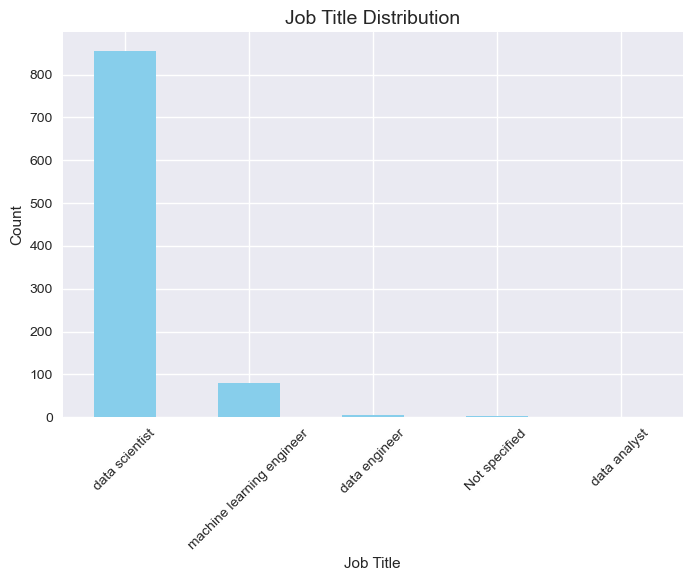

In [43]:
# Job Title Distribution
plt.figure(figsize=(8,5))
df['job_title'].value_counts().plot(kind='bar', color = 'skyblue')
plt.title('Job Title Distribution', fontsize=14)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

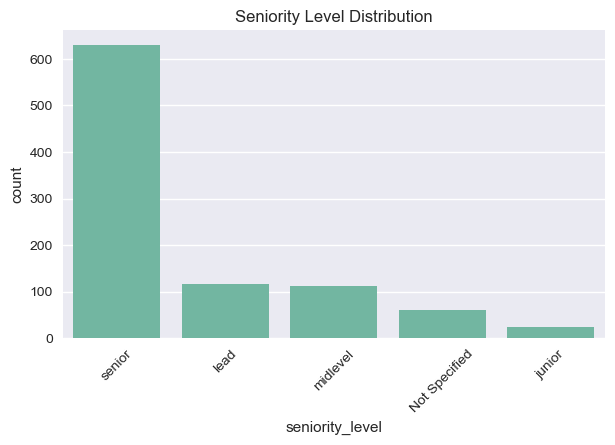

In [45]:
# Seniority Level Breakdown
plt.figure(figsize=(7,4))
sns.countplot(x='seniority_level', data=df, order=df['seniority_level'].value_counts().index)
plt.title('Seniority Level Distribution')
plt.xticks(rotation=45)
plt.show()

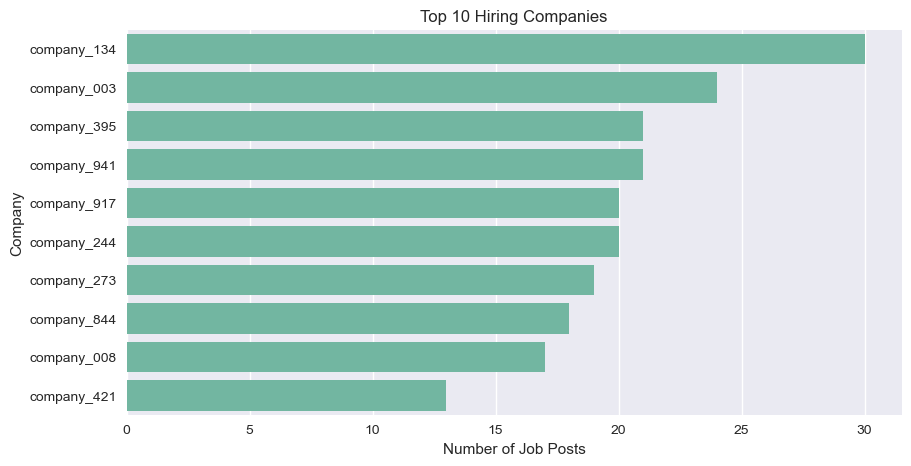

In [47]:
# Top Hiring Companies
top_companies = df['company'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title('Top 10 Hiring Companies')
plt.xlabel('Number of Job Posts')
plt.ylabel("Company")
plt.show()

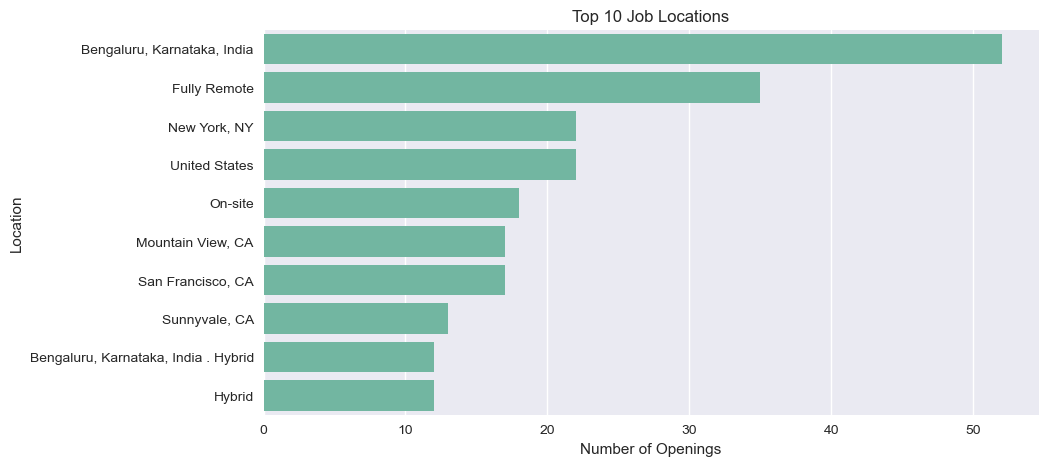

In [48]:
# Top Locations
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Openings')
plt.ylabel('Location')
plt.show()

In [54]:
df['salary_clean'] = df['salary']
df['salary_clean'] = df['salary_clean'].replace(r'[^0-9\-]', '', regex=True)
df[['min_salary', 'max_salary']] = df['salary_clean'].str.split('-', expand=True)
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2


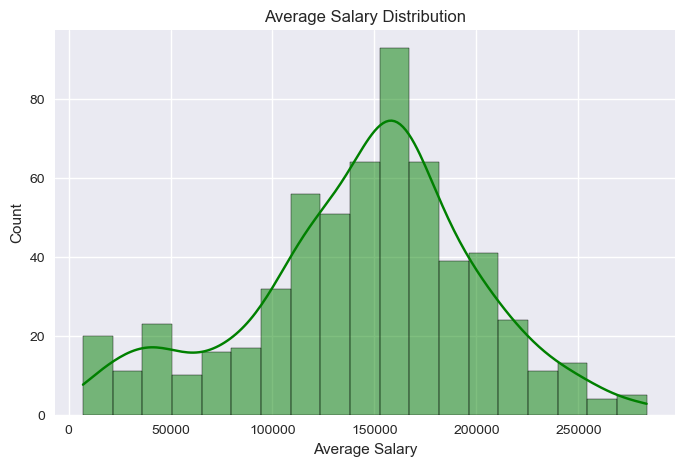

In [55]:
plt.figure(figsize=(8,5))
sns.histplot(df['avg_salary'].dropna(), kde=True, color='green')
plt.title('Average Salary Distribution')
plt.xlabel('Average Salary')
plt.ylabel('Count')
plt.show()

In [60]:
!pip install wordcloud


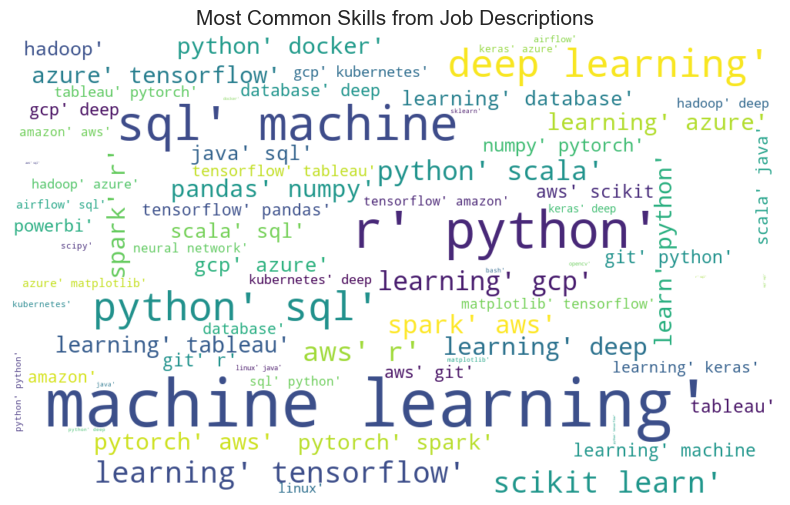

In [62]:
skills_text = ' '.join(df['skills'].dropna().values)

wordcloud = WordCloud(
    width=1000, 
    height=600, 
    background_color='white',
    colormap='viridis'
).generate(skills_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Skills from Job Descriptions', fontsize=15)
plt.show()